In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, 

import os

In [3]:
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
import PIL
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from PIL import Image
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tqdm import tqdm
from imblearn.over_sampling import SMOTE


In [4]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!cp kaggle.json /root/.kaggle/
os.chmod('/root/.kaggle/kaggle.json', 600)  # Set permissions


In [5]:
!kaggle datasets download -d ninadaithal/imagesoasis

Dataset URL: https://www.kaggle.com/datasets/ninadaithal/imagesoasis
License(s): apache-2.0
imagesoasis.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
import zipfile

with zipfile.ZipFile('imagesoasis.zip', 'r') as zip_ref:  # Replace with your zip file name
    zip_ref.extractall('/content/dataset')  # Specify your extraction directory


In [7]:

dataset_dir="/content/dataset/Data"
data_dir=dataset_dir
!pip install split-folders
# import splitfolders
# splitfolders.ratio(dataset_dir, output="output", seed=1345, ratio=(.8, 0.1,0.1))

In [8]:
non_demented = []
very_mild_demented = []
mild_demented = []
moderate_demented = []

# Download per category
for dirname, _, filenames in os.walk('/content/dataset/Data/Non Demented'):
    for filename in filenames:
        non_demented.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/content/dataset/Data/Very mild Dementia'):
    for filename in filenames:
        very_mild_demented.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/content/dataset/Data/Mild Dementia'):
    for filename in filenames:
        mild_demented.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/content/dataset/Data/Moderate Dementia'):
    for filename in filenames:
        moderate_demented.append(os.path.join(dirname, filename))


In [9]:
os.listdir('/root')

['.bashrc',
 '.profile',
 '.keras',
 '.kaggle',
 '.cache',
 '.jupyter',
 '.local',
 '.tmux.conf',
 '.npm',
 '.wget-hsts',
 '.ipython',
 '.config',
 '.launchpadlib']

In [10]:
os.listdir('/content/dataset/Data')

['Moderate Dementia', 'Mild Dementia', 'Non Demented', 'Very mild Dementia']

In [11]:
images = []
labels = []
for subfolder in tqdm(os.listdir('/content/dataset')):
    subfolder_path = os.path.join('/content/dataset', subfolder)
    for folder in os.listdir(subfolder_path):
        subfolder_path2=os.path.join(subfolder_path,folder)
        for image_filename in os.listdir(subfolder_path2):
            image_path = os.path.join(subfolder_path2, image_filename)
            images.append(image_path)
            labels.append(folder)
df = pd.DataFrame({'image': images, 'label': labels})
df

100%|██████████| 1/1 [00:00<00:00,  5.52it/s]


,image,label
0,/content/dataset/Data/Moderate Dementia/OAS1_0...,Moderate Dementia
1,/content/dataset/Data/Moderate Dementia/OAS1_0...,Moderate Dementia
2,/content/dataset/Data/Moderate Dementia/OAS1_0...,Moderate Dementia
3,/content/dataset/Data/Moderate Dementia/OAS1_0...,Moderate Dementia
4,/content/dataset/Data/Moderate Dementia/OAS1_0...,Moderate Dementia
...,...,...
86432,/content/dataset/Data/Very mild Dementia/OAS1_...,Very mild Dementia
86433,/content/dataset/Data/Very mild Dementia/OAS1_...,Very mild Dementia
86434,/content/dataset/Data/Very mild Dementia/OAS1_...,Very mild Dementia
86435,/content/dataset/Data/Very mild Dementia/OAS1_...,Very mild Dementia


<ipython-input-12-bc0bb9f3cbe0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df.label,palette='Set1')


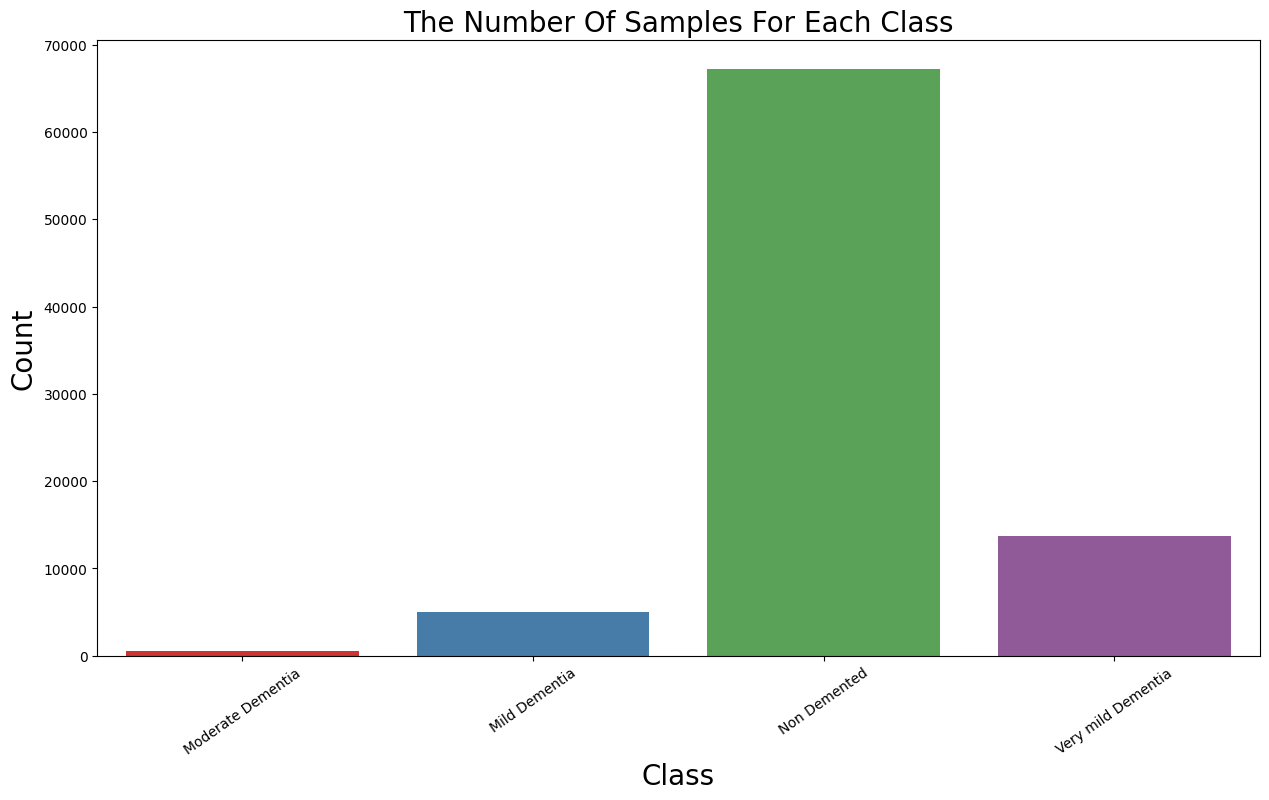

In [12]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x=df.label,palette='Set1')
ax.set_xlabel("Class",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
plt.title('The Number Of Samples For Each Class',fontsize=20)
plt.grid(False)
plt.xticks(rotation=35)
plt.show()

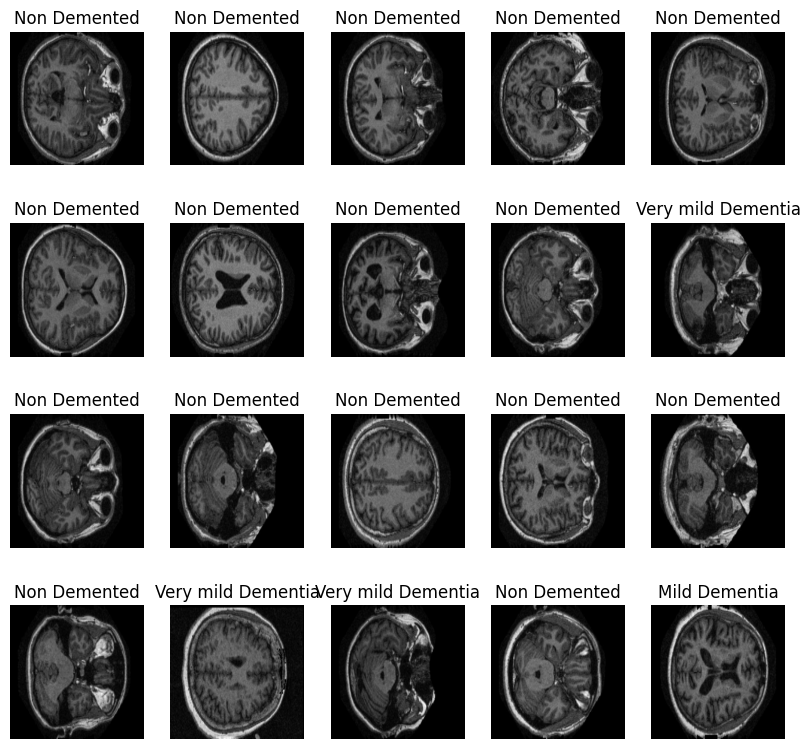

In [13]:
plt.figure(figsize=(10,12))
for n,i in enumerate(np.random.randint(0,len(df),20)):
    plt.subplot(5,5,n+1)
    img=cv2.imread(df.image[i])
    img=cv2.resize(img,(224,224))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.title(df.label[i],fontsize=12)

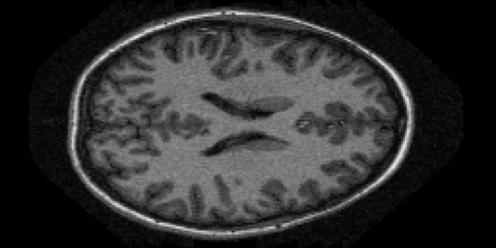

In [14]:
PIL.Image.open(str(non_demented[0]))

In [17]:
import numpy as np

# Assuming non_demented, mild_demented, and very_mild_demented are lists or arrays of images
non_demented = np.random.choice(non_demented, 488, replace=False)
mild_demented = np.random.choice(mild_demented, 488, replace=False)
very_mild_demented = np.random.choice(very_mild_demented, 488, replace=False)


In [19]:
encoder= OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])

OneHotEncoder()

In [20]:
data = []
result = []
for s in non_demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

for s in mild_demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

for s in moderate_demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[2]]).toarray())

for s in very_mild_demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[3]]).toarray())


In [21]:
X=np.array(data)
x=X.shape


In [22]:
y=np.array(result)
y=y.reshape(x[0],4)
y=np.argmax(y, axis=1)


In [23]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42, shuffle = True)

In [24]:
X_train.shape

(1561, 128, 128, 3)

In [25]:
X_test.shape


(391, 128, 128, 3)

SVM Model


In [26]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Flatten the images
data_flat = [img.flatten() for img in data]
data_flat = np.array(data_flat)

# Convert result labels to a 1D array
result_labels = [np.argmax(label) for label in result]  # Extract class labels
result_labels = np.array(result_labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_flat, result_labels, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='poly', C=10 , gamma=10 , degree=4)  # You can try 'rbf' or 'poly' kernels as well
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM: {accuracy:.2f}")


Accuracy of SVM: 0.92


Explainable AI

In [ ]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=caddfd9a72d0b5f67503f05ae7df2a84875bd6ac4cdd068b92b5e42c0401fc22
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


  0%|          | 0/1000 [00:00<?, ?it/s]

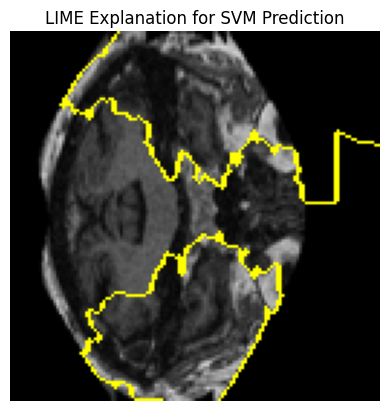

In [35]:
import lime
from lime import lime_image
from skimage.color import gray2rgb
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries

# Update SVM to enable probability predictions for LIME compatibility
svm_model = SVC(kernel='poly', C=10, gamma=10, degree=4, probability=True)
svm_model.fit(X_train, y_train)

# Initialize LIME image explainer
explainer = lime_image.LimeImageExplainer()

# Define a function that provides probability predictions for LIME
def svm_predict_proba(images):
    # Flatten the images for SVM input format
    flattened_images = [img.flatten() for img in images]
    return svm_model.predict_proba(flattened_images)

# Select an image to explain (e.g., the first test image)
sample_idx = 0
image = X_test[sample_idx].reshape(128, 128, 3)

# Use LIME to explain the prediction
explanation = explainer.explain_instance(
    image,
    classifier_fn=svm_predict_proba,
    top_labels=2,
    hide_color=0,
    num_samples=1000
)

# Visualize explanation for the predicted label
temp, mask = explanation.get_image_and_mask(
    label=svm_model.predict([X_test[sample_idx]])[0],
    positive_only=True,
    hide_rest=False,
    num_features=5,
    min_weight=0.1
)

# Display the image with LIME mask overlay
plt.imshow(mark_boundaries(temp, mask))
plt.title(f"LIME Explanation for SVM Prediction")
plt.axis('off')
plt.show()


